# Начало работы с датасетом

In [31]:
import pandas as pd
import numpy as np
import os

pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 400)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from pprint import pprint
from pathlib import Path

In [42]:
pd.DataFrame(data={'Date': ['дата'], 'Hour': ['час'], 'Temperature': ['температура'], 'Humidity' : ['относительная влажность, %'], 'Wind speed': ['скорость ветра, м/с'], 'Rainfall': ['кол-во осадков в виде дождя, мм'], 
                   'Snowfall': ['кол-во осадков в виде снега, см'], 'Seasons': ['сезон'], 'Holiday': ['рабочий или праздничный день'], 'Functioning Day': ['рабочий или нерабочий день проката'], 
                   'Partner 1': ['количество велосипедов, вхятых в аренду в первом сервисе'], 'Partner 2': ['количество велосипедов, вхятых в аренду во втором сервисе']})

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
0,дата,час,температура,"относительная влажность, %","скорость ветра, м/с","кол-во осадков в виде дождя, мм","кол-во осадков в виде снега, см",сезон,рабочий или праздничный день,рабочий или нерабочий день проката,"количество велосипедов, вхятых в аренду в первом сервисе","количество велосипедов, вхятых в аренду во втором сервисе"


In [45]:
bikes = pd.read_csv('Data/BikeData.csv')
print(bikes.shape)
bikes.head(n=3)

(8760, 12)


,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140


In [47]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Hour             8760 non-null   int64  
 2   Temperature      8581 non-null   float64
 3   Humidity         8760 non-null   int64  
 4   Wind speed       8760 non-null   float64
 5   Rainfall         8760 non-null   float64
 6   Snowfall         8760 non-null   float64
 7   Seasons          8760 non-null   object 
 8   Holiday          8760 non-null   object 
 9   Functioning Day  8760 non-null   object 
 10  Partner 1        8760 non-null   int64  
 11  Partner 2        8760 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 821.4+ KB


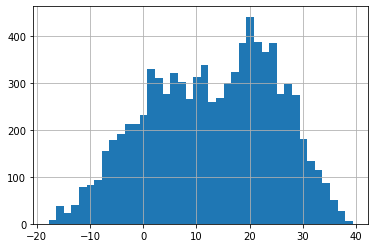

In [52]:
bikes['Temperature'].hist(bins=40);

In [56]:
bikes['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [5]:
bikes[['Partner 1', 'Partner 2']]

,Partner 1,Partner 2
0,207,50
1,139,80
2,22,140
3,43,105
4,59,38
...,...,...
8755,467,177
8756,296,63
8757,571,665
8758,171,457


In [6]:
bikes.iloc[124]

Date               06/12/2017
Hour                        4
Temperature              -3.4
Humidity                   75
Wind speed                0.0
Rainfall                  0.0
Snowfall                  0.4
Seasons                Winter
Holiday            No Holiday
Functioning Day           Yes
Partner 1                  36
Partner 2                   4
Name: 124, dtype: object

In [7]:
bikes.iloc[124]['Holiday']

'No Holiday'

In [59]:
bikes[bikes['Holiday'] == 'Holiday'].shape

(432, 12)

In [60]:
bikes[(bikes['Holiday'] == 'Holiday') & 
      (bikes['Temperature'] > 15)].shape

(179, 12)

In [61]:
bikes[(bikes['Holiday'] == 'Holiday') | 
      (bikes['Temperature'] > 15)].shape

(4293, 12)

In [11]:
bikes[~((bikes['Holiday'] == 'Holiday') | 
      (bikes['Temperature'] > 15))].shape

(4467, 12)

In [12]:
bikes[bikes['Temperature'].isna()].shape

(179, 12)

In [13]:
bikes[bikes['Temperature'].isin(range(10,20))].shape

(222, 12)

In [14]:
bikes[bikes['Seasons'].isin(['Winter', 'Autumn'])].shape

(4344, 12)

In [15]:
bikes['Temperature'].sort_values()

1352   -17.8
1353   -17.5
1351   -17.5
1350   -17.4
1349   -16.9
        ... 
8669     NaN
8679     NaN
8710     NaN
8717     NaN
8742     NaN
Name: Temperature, Length: 8760, dtype: float64

In [16]:
bikes['Temperature'].sort_values(ascending=False)

5848    39.4
5847    39.3
5849    39.0
5846    38.7
5825    38.0
        ... 
8669     NaN
8679     NaN
8710     NaN
8717     NaN
8742     NaN
Name: Temperature, Length: 8760, dtype: float64

In [17]:
bikes.sort_values(by=['Temperature', 'Humidity'])

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
1352,26/01/2018,8,-17.8,40,2.5,0.0,0.5,Winter,No Holiday,Yes,235,288
1353,26/01/2018,9,-17.5,37,3.8,0.0,0.5,Winter,No Holiday,Yes,76,26
1351,26/01/2018,7,-17.5,38,3.4,0.0,0.5,Winter,No Holiday,Yes,93,31
1350,26/01/2018,6,-17.4,40,1.6,0.0,0.5,Winter,No Holiday,Yes,33,18
1349,26/01/2018,5,-16.9,38,2.3,0.0,0.5,Winter,No Holiday,Yes,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...
5114,02/07/2018,2,NaN,97,0.8,2.0,0.0,Summer,No Holiday,Yes,9,14
5336,11/07/2018,8,NaN,97,0.8,0.0,0.0,Summer,No Holiday,Yes,537,384
6526,29/08/2018,22,NaN,97,2.1,4.5,0.0,Summer,No Holiday,Yes,0,17
2506,15/03/2018,10,NaN,98,1.2,0.0,0.0,Spring,No Holiday,Yes,27,19


In [18]:
bikes.sort_values(by=['Temperature', 'Humidity'], ascending=[True, False])

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
1352,26/01/2018,8,-17.8,40,2.5,0.0,0.5,Winter,No Holiday,Yes,235,288
1351,26/01/2018,7,-17.5,38,3.4,0.0,0.5,Winter,No Holiday,Yes,93,31
1353,26/01/2018,9,-17.5,37,3.8,0.0,0.5,Winter,No Holiday,Yes,76,26
1350,26/01/2018,6,-17.4,40,1.6,0.0,0.5,Winter,No Holiday,Yes,33,18
1349,26/01/2018,5,-16.9,38,2.3,0.0,0.5,Winter,No Holiday,Yes,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...
1238,21/01/2018,14,NaN,18,1.2,0.0,0.0,Winter,No Holiday,Yes,119,100
1910,18/02/2018,14,NaN,17,1.8,0.0,0.0,Winter,No Holiday,Yes,7,162
1886,17/02/2018,14,NaN,15,4.0,0.0,0.0,Winter,Holiday,Yes,0,58
3400,21/04/2018,16,NaN,13,3.3,0.0,0.0,Spring,No Holiday,Yes,1649,560


In [19]:
bikes.sort_values(by=['Humidity'])

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
4255,27/05/2018,7,17.6,0,1.4,0.0,0.0,Spring,No Holiday,Yes,48,139
4278,28/05/2018,6,16.2,0,0.5,0.0,0.0,Spring,No Holiday,Yes,285,478
4277,28/05/2018,5,16.6,0,0.9,0.0,0.0,Spring,No Holiday,Yes,153,69
4279,28/05/2018,7,16.8,0,0.8,0.0,0.0,Spring,No Holiday,Yes,217,955
4276,28/05/2018,4,NaN,0,0.4,0.0,0.0,Spring,No Holiday,Yes,51,58
...,...,...,...,...,...,...,...,...,...,...,...,...
2507,15/03/2018,11,13.9,98,1.4,0.0,0.0,Spring,No Holiday,Yes,48,10
4036,18/05/2018,4,18.1,98,1.7,1.0,0.0,Spring,No Holiday,Yes,0,8
4035,18/05/2018,3,18.3,98,1.6,2.0,0.0,Spring,No Holiday,Yes,15,24
6499,28/08/2018,19,23.9,98,0.8,7.0,0.0,Summer,No Holiday,Yes,56,47
